In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Customer.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

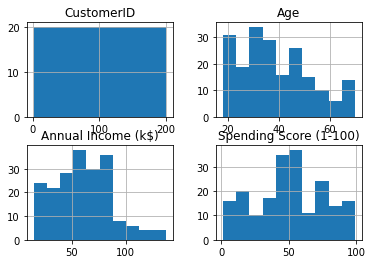

In [3]:
data.hist()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(['Male', 'Female'])
data['Gender'] = encoder.transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
def plot_age_income():
    age_income_ax = data[data['Gender'] == 1].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label='Male', color='blue', alpha=0.5)
    data[data['Gender'] == 0].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label='Female', color='red', alpha=0.5, ax=age_income_ax)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.show()

In [8]:
def plot_age_score():
    age_score_ax = data[data['Gender'] == 1].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label='Male', color='blue', alpha=0.5)
    data[data['Gender'] == 0].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label='Female', color='red', alpha=0.5, ax=age_score_ax)
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

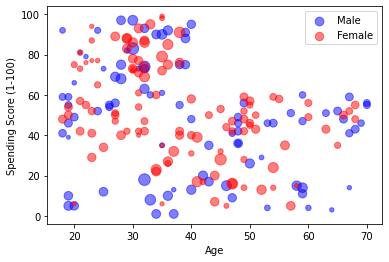

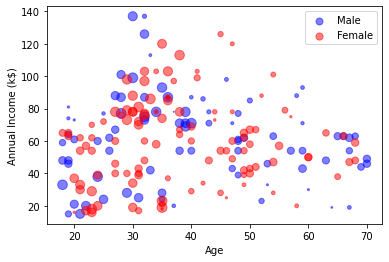

In [9]:
plot_age_score()
plot_age_income()

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = df.values
X[0:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

- ### KMEANS

0.29307334005502633
0.383798873822341
0.4052954330641215
0.44482259384548795
0.45205475380756527
0.4409411333609709
0.4275788369618678
0.39791128547609517
0.3830037852508829
0.3699202664386526
0.35778342163276955
0.33894711708745573
0.3435525362847264
0.32823407559045104


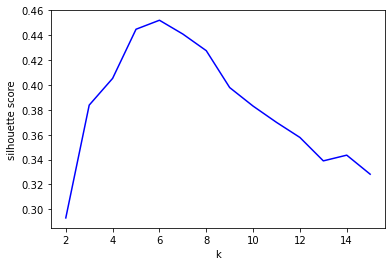

Max silhouette score is: 0.45205475380756527
The best K is: 6


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_k = 15
silhouette_scores = []
kmeans_models = []
for i in range(2, max_k + 1):
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=20)
    kmeans.fit(X)
    s_score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(s_score)
    kmeans_models.append(kmeans)
    print(s_score)

plt.plot(np.arange(2, len(silhouette_scores) + 2), silhouette_scores, color='b')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()
max_silhouette_scores = max(silhouette_scores)
best_index = silhouette_scores.index(max_silhouette_scores)
best_kmeans = kmeans_models[best_index]
print("Max silhouette score is:", max_silhouette_scores)
print("The best K is:", best_index + 2)


In [14]:
data['KMEANS_Clusters'] = best_kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMEANS_Clusters
0,1,1,19,15,39,5
1,2,1,21,15,81,4
2,3,0,20,16,6,5
3,4,0,23,16,77,4
4,5,0,31,17,40,5


In [15]:
data.groupby('KMEANS_Clusters').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
KMEANS_Clusters,,,,,
0,90.052632,0.342105,27.000000,56.657895,49.131579
1,164.428571,0.571429,41.685714,88.228571,17.285714
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,81.155556,0.444444,56.155556,53.377778,49.088889
4,23.090909,0.409091,25.272727,25.727273,79.363636
5,21.190476,0.380952,44.142857,25.142857,19.523810


Plot AGE-SCORE before clustering


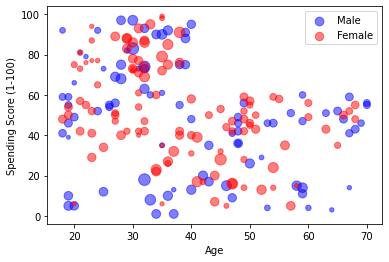

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

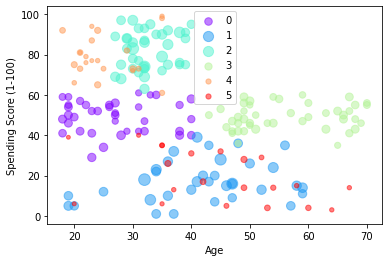

In [16]:
from matplotlib import cm
print("Plot AGE-SCORE before clustering")
plot_age_score()
colors = cm.rainbow(np.linspace(0, 1, best_index + 2))
ax = data[data['KMEANS_Clusters'] == 0].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label=0, color=colors[0], alpha=0.5)
for i in range(1, best_index + 2):
    data[data['KMEANS_Clusters'] == i].plot(kind= 'scatter', x='Age', y='Spending Score (1-100)', s='Annual Income (k$)', label=i, color=colors[i], alpha=0.5, ax=ax)
plt.show()

Plot AGE-INCOME before clustering


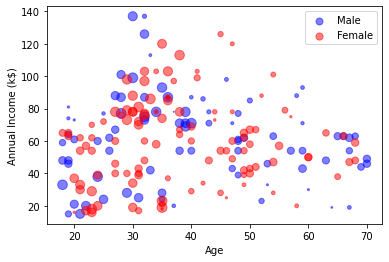

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

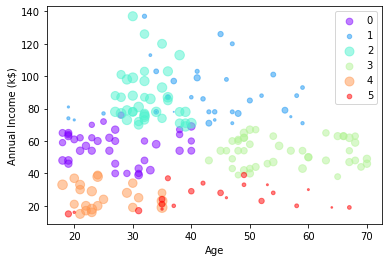

In [17]:
from matplotlib import cm
print("Plot AGE-INCOME before clustering")
plot_age_income()
colors = cm.rainbow(np.linspace(0, 1, best_index + 2))
ax = data[data['KMEANS_Clusters'] == 0].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label=0, color=colors[0], alpha=0.5)
for i in range(1, best_index + 2):
    data[data['KMEANS_Clusters'] == i].plot(kind= 'scatter', x='Age', y='Annual Income (k$)', s='Spending Score (1-100)', label=i, color=colors[i], alpha=0.5, ax=ax)
plt.show()

- ### Hierarchical

In [18]:
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(X, metric="euclidean")

In [19]:
import pylab
from scipy.cluster import hierarchy

Z = hierarchy.linkage(distance_matrix, 'complete')

C:\Users\rohani.sara\AppData\Local\Temp\ipykernel_12792\3378631557.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance_matrix, 'complete')


In [20]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
data['HIERARCHICAL_Clusters'] = clusters
set_clusters = set(clusters)
print(set_clusters)
data.head()

{1, 2, 3, 4, 5}


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMEANS_Clusters,HIERARCHICAL_Clusters
0,1,1,19,15,39,5,3
1,2,1,21,15,81,4,5
2,3,0,20,16,6,5,3
3,4,0,23,16,77,4,5
4,5,0,31,17,40,5,3


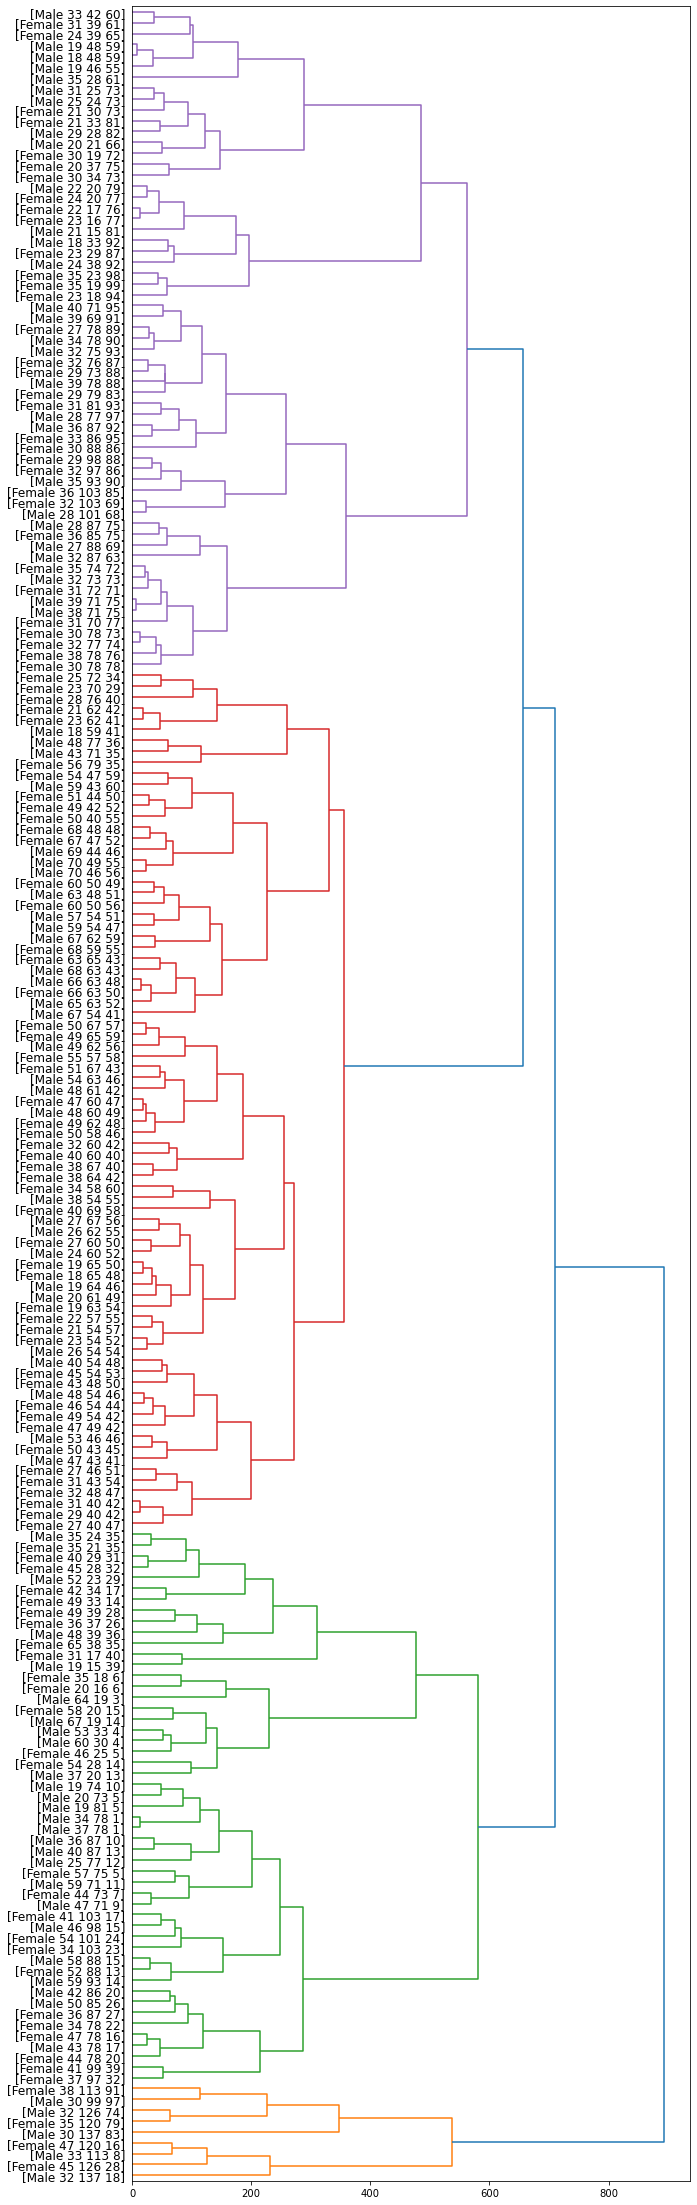

In [21]:
fig = pylab.figure(figsize=(10,40))
def llf(id):
    if data['Gender'][id] == 1:
        gender = "Male"
    if data['Gender'][id] == 0:
        gender = "Female"
    return '[%s %s %s %s]' % (gender, data['Age'][id], data['Annual Income (k$)'][id], data['Spending Score (1-100)'][id])
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

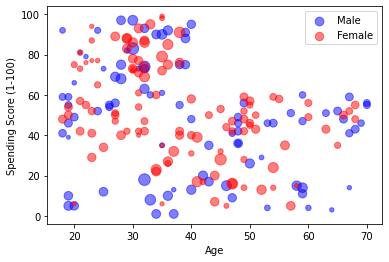

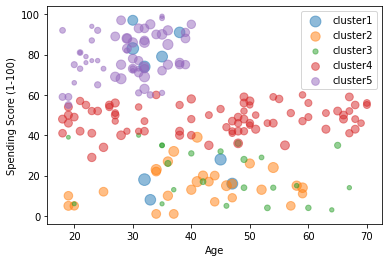

In [22]:
plot_age_score()
for cluster in set_clusters:
    subset = data[data['HIERARCHICAL_Clusters'] == cluster] # a data frame from people in the given cluster
    plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label='cluster'+str(cluster), s=subset['Annual Income (k$)'], alpha=0.5)
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')

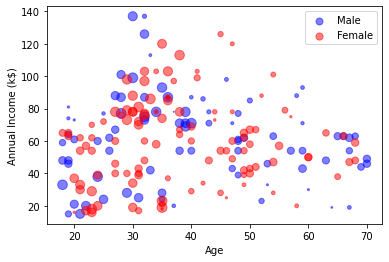

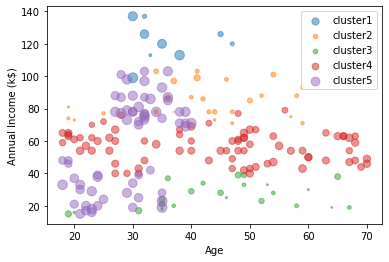

In [23]:
plot_age_income()
for cluster in set_clusters:
    subset = data[data['HIERARCHICAL_Clusters'] == cluster]
    plt.scatter(subset['Age'], subset['Annual Income (k$)'], label='cluster'+str(cluster), s=subset['Spending Score (1-100)'], alpha=0.5)
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')